In [1]:
#In a new Jupyter Notebook file called API_practice.ipynb, 
# add the following lists and pack them into the zipped tuple. Then, run the cell.

In [2]:
# Create a practice set of random latitude and longitude combinations.
lats = [25.12903645, 25.92017388, 26.62509167, -59.98969384, 37.30571269]
lngs = [-67.59741259, 11.09532135, 74.84233102, -76.89176677, -61.13376282]
lat_lngs = zip(lats, lngs)

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

25.12903645 -67.59741259
25.92017388 11.09532135
26.62509167 74.84233102
-59.98969384 -76.89176677
37.30571269 -61.13376282


# 6. 1. 5 Generate random world cities 

In [5]:
# Use the citipy module to determine city based on latitude and longitude.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

In [6]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

cockburn town tc
gat ly
parvatsar in
punta arenas cl
saint george bm


# 6.2.3 make an api call

In [28]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
## Make an API call

In [29]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
  

In [41]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"


In [42]:
# Make a 'Get' request for the city weather.
city_weather = requests.get(city_url)
#city_weather.status_code
city_weather

<Response [200]>

In [12]:
city_weather_json = city_weather.json()

In [13]:
city_weather_json.get("main")

{'temp': 70.77,
 'feels_like': 71.31,
 'temp_min': 66.15,
 'temp_max': 73.85,
 'pressure': 1018,
 'humidity': 80}

In [14]:
city_weather.status_code

200

In [15]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Bston"
city_weather = requests.get(city_url)
city_weather

<Response [404]>

In [46]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [47]:
# Get the text of the 'Get' request.
city_weather.text

'{"coord":{"lon":-71.0598,"lat":42.3584},"weather":[{"id":801,"main":"Clouds","description":"few clouds","icon":"02n"}],"base":"stations","main":{"temp":69.37,"feels_like":69.85,"temp_min":65.17,"temp_max":72.05,"pressure":1019,"humidity":82},"visibility":10000,"wind":{"speed":5.01,"deg":0,"gust":0},"clouds":{"all":17},"dt":1657853549,"sys":{"type":2,"id":2009921,"country":"US","sunrise":1657790386,"sunset":1657844400},"timezone":-14400,"id":4930956,"name":"Boston","cod":200}'

In [48]:
# Get the JSON text of the 'Get' request.
city_weather.json()

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 801,
   'main': 'Clouds',
   'description': 'few clouds',
   'icon': '02n'}],
 'base': 'stations',
 'main': {'temp': 69.37,
  'feels_like': 69.85,
  'temp_min': 65.17,
  'temp_max': 72.05,
  'pressure': 1019,
  'humidity': 82},
 'visibility': 10000,
 'wind': {'speed': 5.01, 'deg': 0, 'gust': 0},
 'clouds': {'all': 17},
 'dt': 1657853549,
 'sys': {'type': 2,
  'id': 2009921,
  'country': 'US',
  'sunrise': 1657790386,
  'sunset': 1657844400},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [58]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
if city_weather.status_code == 200:
    print(f"City Weather found.")
else:
    print(f"City weather not found.")

City Weather found.


In [59]:
# Create an endpoint URL for a city.
#city_url = url + "&q=" + "Bston"
#city_weather = requests.get(city_url)
#if city_weather.status_code == 200:
    #print(f"City Weather found.")
#else:
    #print(f"City weather not found.")
    #City weather not found.

In [60]:
#print(city_url) 
#{"cod":"404","message":"city not found"}

In [61]:
boston_data = city_weather.json()
boston_data

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 801,
   'main': 'Clouds',
   'description': 'few clouds',
   'icon': '02n'}],
 'base': 'stations',
 'main': {'temp': 69.28,
  'feels_like': 69.76,
  'temp_min': 64.15,
  'temp_max': 72.14,
  'pressure': 1018,
  'humidity': 82},
 'visibility': 10000,
 'wind': {'speed': 5.01, 'deg': 0, 'gust': 0},
 'clouds': {'all': 17},
 'dt': 1657855570,
 'sys': {'type': 2,
  'id': 2009921,
  'country': 'US',
  'sunrise': 1657790386,
  'sunset': 1657844400},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [62]:
boston_data["sys"]

{'type': 2,
 'id': 2009921,
 'country': 'US',
 'sunrise': 1657790386,
 'sunset': 1657844400}

In [23]:
boston_data['sys']["country"]

'US'

In [63]:
#retrieve the data in the weather data
boston_data["dt"]

1657855570

In [25]:
#can get the latitude, longitude, maximum temperature, humidity, percent cloudiness, and wind speed.
lat = boston_data["coord"]["lat"]
lng = boston_data["coord"]["lon"]
max_temp = boston_data["main"]["temp_max"]
humidity = boston_data["main"]["humidity"]
clouds = boston_data["clouds"]["all"]
wind = boston_data["wind"]["speed"]
print(lat, lng, max_temp, humidity, clouds, wind)

42.3584 -71.0598 73.85 80 75 5.01


## Convert the data timestamp

In [26]:
# Import the datetime module from the datetime library.
from datetime import datetime
# Get the date from the JSON file.
date = boston_data["dt"]
# Convert the UTC date to a date format with year, month, day, hours, minutes, and seconds.
datetime.utcfromtimestamp(date)

datetime.datetime(2022, 7, 15, 2, 5, 30)

In [27]:
datetime.utcfromtimestamp(date).strftime('%Y-%m-%d %H:%M:%S')

'2022-07-15 02:05:30'

## 6.2.6 Get the city weather data

In [64]:
#Let's use pseudocode to map out, at a high level, how we will get the weather data for each city for the website.
#We will need to do the following:
#Import our dependencies and initialize counters and an empty list that will hold the weather data.
#Loop through the cities list.
#Group the cities in sets of 50 to log the process as we find the weather data for each city.
#Two counters will be needed here: one to log the city count from 1 to 50, and another for the sets.
#Build the city_url or endpoint for each city.
#Log the URL and the record and set numbers.
#Make an API request for each city.
#Parse the JSON weather data for the following:
#City, country, and date
#Latitude and longitude
#Maximum temperature
#Humidity
#Cloudiness
#Wind speed
#Add the data to a list in a dictionary format and then convert the list to a DataFrame.

In [65]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1657861067.26394

In [66]:
today = time.strftime("%x")
today

'07/15/22'

# 6. 4 .1 Use linear Regression to Find the Relationship Between Variables

In [67]:
# video
from scipy.stats import linregress
import matplotlib.pyplot as plt

In [68]:
temps = [ 18.2, 29.5, 35.9, 50.1, 58.6, 69.9]
daylight = [7.6, 9.2, 12.2, 13.4, 13.9, 14.2]

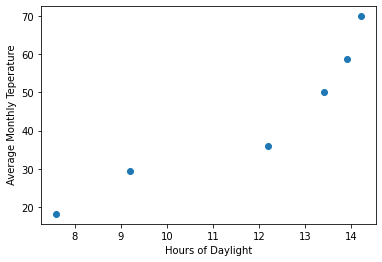

In [69]:
plt.scatter(daylight, temps)
plt.xlabel("Hours of Daylight")
plt.ylabel(" Average Monthly Teperature")
plt.show()

In [71]:
linregress(daylight, temps)

LinregressResult(slope=6.581086519114689, intercept=-33.6277665995976, rvalue=0.9311084368414837, pvalue=0.006955589896966967, stderr=1.289002302137587, intercept_stderr=15.482790398859171)

In [72]:
(slope, intercept, rval, pval, stderr)= linregress(daylight, temps)

In [74]:
line_eq = " y =" +str(round(slope, 2)) +"x" +str(round(intercept,2))
print(line_eq)

 y =6.58x-33.63


In [75]:
regression_values = [(day*slope +intercept) for day in daylight]

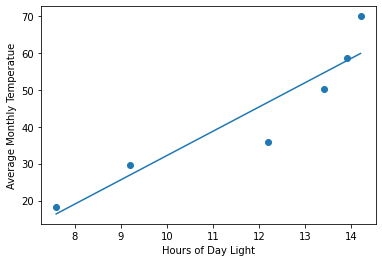

In [77]:
plt.scatter(daylight, temps)
plt.plot(daylight, regression_values)
plt.xlabel("Hours of Day Light")
plt.ylabel("Average Monthly Temperatue")
plt.show()